In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pour l'athlète ayant remporté le plus de médailles, une courbe qui représente l'évolution de sa place sur chacune des
marches du podium en fonction de son âge

In [36]:
general = pd.read_csv('it_summer.csv')
year_birth = pd.read_csv('olympic_athletes.csv')
general

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,379,Shooting,tokyo-2020,Skeet women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/diana-bacosi,Diana BACOSI,Italy,IT,ITA,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,492,Canoe Sprint,tokyo-2020,Men's Kayak Single 200m,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/manfredi-rizza,Manfredi RIZZA,Italy,IT,ITA,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,495,Cycling Road,tokyo-2020,Women's Road Race,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/elisa-longo-b...,Elisa LONGO BORGHINI,Italy,IT,ITA,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,555,Boxing,tokyo-2020,Women's Feather (54-57kg),Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/irma-testa,Irma TESTA,Italy,IT,ITA,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
4,639,Marathon Swimming,tokyo-2020,Men's 10km,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/gregorio-palt...,Gregorio PALTRINIERI,Italy,IT,ITA,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,21294,Fencing,paris-1900,sabre masters men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/antonio-conte,Antonio CONTE,Italy,IT,ITA,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
642,21295,Fencing,paris-1900,sabre masters men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/italo-santelli,Italo SANTELLI,Italy,IT,ITA,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
643,21306,Cycling Track,paris-1900,Course De Primes Men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/enrico-brusoni,Enrico BRUSONI,Italy,IT,ITA,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
644,21488,Equestrian Jumping,paris-1900,individual mixed,Open,SILVER,Athlete,NaN,https://olympics.com/en/athletes/gian-giorgio-...,Gian Giorgio TRISSINO,Italy,IT,ITA,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900


In [37]:
# trouver l'athlète qui a gagné le plus de médailles 
# j'utilise l'option groupby et je recherche le max
# result = general.groupby(by = ['athlete_url']).size().reset_index(name='occurence').max()
# result
# ! ATTENTION ! max() trouve le max de la colonne mais ne fait pas le lien entre les colonnes!!

In [38]:
result = general.groupby(by = ['athlete_url']).size().reset_index(name='occurence')
result

,athlete_url,occurence
0,https://olympics.com/en/athletes/abdon-pamich,2
1,https://olympics.com/en/athletes/abraham-de-je...,1
2,https://olympics.com/en/athletes/adelmo-bulgar...,1
3,https://olympics.com/en/athletes/adolfo-consolini,2
4,https://olympics.com/en/athletes/agostino-abba...,1
...,...,...
351,https://olympics.com/en/athletes/vito-dell-aquila,1
352,https://olympics.com/en/athletes/vittorio-tama...,1
353,https://olympics.com/en/athletes/viviana-bottaro,1
354,https://olympics.com/en/athletes/wladimiro-cal...,1


In [39]:
# Le nombre maximum de médailles gagnées est de 5
result['occurence'].max()

5

In [40]:
# result[result['occurence']=='5'].athlete_url
# result[result['occurence'].str.contains('5')]
# ne fonctionnenent pas
# utiliser query quand on veut faire apparaître toute une ligne
ab = result.query("occurence == 5")
ab

# ici on voit qu'il y a trois athlètes qui ont gagné le lus de médailles. J'ai décidé de me concentrer sur le premier

,athlete_url,occurence
42,https://olympics.com/en/athletes/antonio-rossi,5
215,https://olympics.com/en/athletes/klaus-dibiasi,5
246,https://olympics.com/en/athletes/maria-valenti...,5


2e partie : représenter l'évolution de sa place sur chacune des marches du podium en fonction de son âge

In [41]:
# maintenant faire apparaître toutes les lignes avec son url dans le fichier général
perfs = general.query("athlete_url == 'https://olympics.com/en/athletes/antonio-rossi'")
perfs
# 

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
163,6867,Canoe Sprint,athens-2004,K2 1000m kayak double men,Men,SILVER,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,Italy,IT,ITA,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004
181,7471,Canoe Sprint,sydney-2000,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,Italy,IT,ITA,sydney-2000,2000-10-01T09:00:00Z,2000-09-15T01:00:00Z,Australia,Sydney 2000,Summer,2000
209,8569,Canoe Sprint,atlanta-1996,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,Italy,IT,ITA,atlanta-1996,1996-08-05T21:00:00Z,1996-07-19T12:00:00Z,United States,Atlanta 1996,Summer,1996
212,8584,Canoe Sprint,atlanta-1996,K1 500m kayak single men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,Italy,IT,ITA,atlanta-1996,1996-08-05T21:00:00Z,1996-07-19T12:00:00Z,United States,Atlanta 1996,Summer,1996
243,9668,Canoe Sprint,barcelona-1992,K2 500m kayak double men,Men,BRONZE,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,Italy,IT,ITA,barcelona-1992,1992-08-09T18:00:00Z,1992-07-25T06:00:00Z,Spain,Barcelona 1992,Summer,1992


In [42]:
# je vais lier les 2 tables via leurs url :
partie2 = pd.merge(perfs, year_birth, left_on="athlete_url", right_on="athlete_url")
partie2

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name_x,...,game_location,game_name,game_season,game_year,athlete_full_name_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,6867,Canoe Sprint,athens-2004,K2 1000m kayak double men,Men,SILVER,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Greece,Athens 2004,Summer,2004,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...
1,7471,Canoe Sprint,sydney-2000,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Australia,Sydney 2000,Summer,2000,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...
2,8569,Canoe Sprint,atlanta-1996,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,United States,Atlanta 1996,Summer,1996,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...
3,8584,Canoe Sprint,atlanta-1996,K1 500m kayak single men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,United States,Atlanta 1996,Summer,1996,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...
4,9668,Canoe Sprint,barcelona-1992,K2 500m kayak double men,Men,BRONZE,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Spain,Barcelona 1992,Summer,1992,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...


In [43]:
# nouvelle colonne avec l'age au moment du gain :
partie2 = partie2.assign(age = partie2['game_year'] - partie2['athlete_year_birth'])
partie2
# result = result.assign(age = result['game_year'] - result['athlete_year_birth'])

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name_x,...,game_name,game_season,game_year,athlete_full_name_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio,age
0,6867,Canoe Sprint,athens-2004,K2 1000m kayak double men,Men,SILVER,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Athens 2004,Summer,2004,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...,36.0
1,7471,Canoe Sprint,sydney-2000,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Sydney 2000,Summer,2000,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...,32.0
2,8569,Canoe Sprint,atlanta-1996,K2 1000m kayak double men,Men,GOLD,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Atlanta 1996,Summer,1996,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...,28.0
3,8584,Canoe Sprint,atlanta-1996,K1 500m kayak single men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Atlanta 1996,Summer,1996,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...,28.0
4,9668,Canoe Sprint,barcelona-1992,K2 500m kayak double men,Men,BRONZE,GameTeam,Italy team,https://olympics.com/en/athletes/antonio-rossi,Antonio ROSSI,...,Barcelona 1992,Summer,1992,Antonio ROSSI,5,Barcelona 1992,1968.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,\n\n\nItaly's Antonio Rossi has won Olympic me...,24.0


In [44]:
# pour représenter les médailles sur l'axe des ordonnées, j'assigne un chiffre à chaque type de médailles 

diag = pd.DataFrame({"Age": [32,28,28,36,24],
                     "podium_range": ['1','1','1','2','3']})
diag

# cette opération à été faite à la main car elle comporte peu de valeurs 

,Age,podium_range
0,32,1
1,28,1
2,28,1
3,36,2
4,24,3


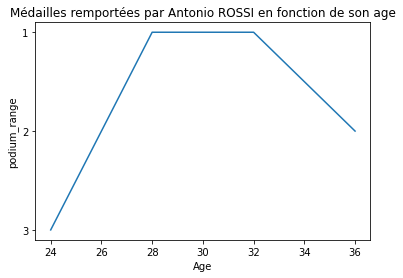

In [75]:
sns.lineplot(data = diag , x="Age", y="podium_range").set_title("Médailles remportées par Antonio ROSSI en fonction de son age")
# plt.plot([28,28], [1, max(diag)], color ='r')
# en jouant cette ligne, la légende de l'axe des y se renote à la verticale. J'ai donc choisis de ne pas la monter 
plt.savefig('ROSSI')